In [19]:
import pandas as pd 
import plotnine as plt
from plotnine import *
from datetime import datetime, time
import numpy as np
from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [20]:
def flight_time_plot(df, city):

    #Extract relevant columns: Departure Date/Time and Price
    df_time_and_flight = df[['depFlight_departure', 'price_amount']].copy()

    #Group prices by Departure Time and find the Median Price at each time
    df_time_and_flight['departure_time'] = df_time_and_flight['depFlight_departure'].str[11:]
    df_time_and_flight.drop('depFlight_departure', axis = 1, inplace = True)
    df_median = df_time_and_flight.groupby('departure_time', as_index = False)['price_amount'].median()
    df_median['departure_time'] = pd.to_datetime(df_median['departure_time'])

    #Plot Price vs. Booking Time
    return(ggplot(df_median, aes(x='departure_time', y='price_amount')) + geom_point() + \
              geom_line() + \
              theme(axis_text_x=element_text(angle=90)) + \
              labs(x="Departure Time", y="Price", title= ("Average Price over Departure Time: " + city)) + \
              scale_x_datetime(labels=date_format("%H:%M"), breaks=date_breaks("1 hour")) + \
              theme(axis_text_x=element_text(angle=45)) + \
              labs(x="Departure Time", y="Price"))


In [21]:
df_berlin = pd.read_csv("../dep_flights/depFlights_0320/berlin_0320.csv")

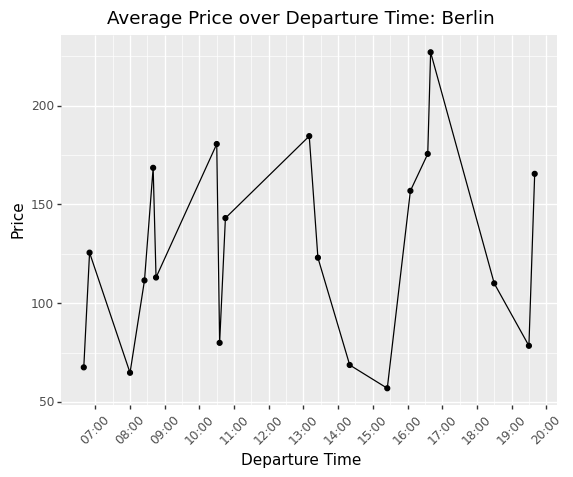

<ggplot: (8771902393604)>

In [22]:
flight_time_plot(df_berlin, 'Berlin')

In [23]:
df_athens = pd.read_csv("../dep_flights/depFlights_0320/athens_0320.csv")

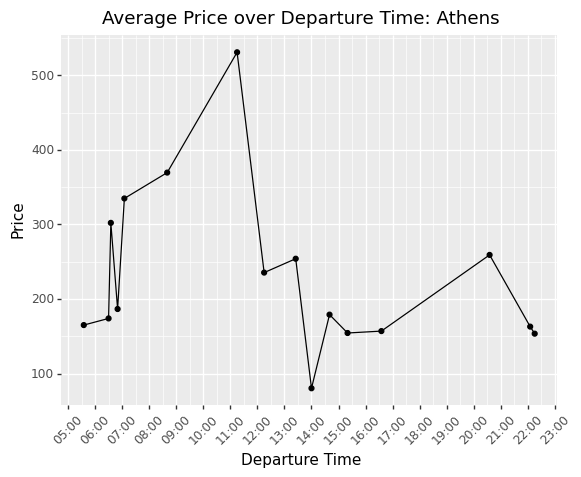

<ggplot: (8771939126450)>

In [24]:
flight_time_plot(df_athens, 'Athens')

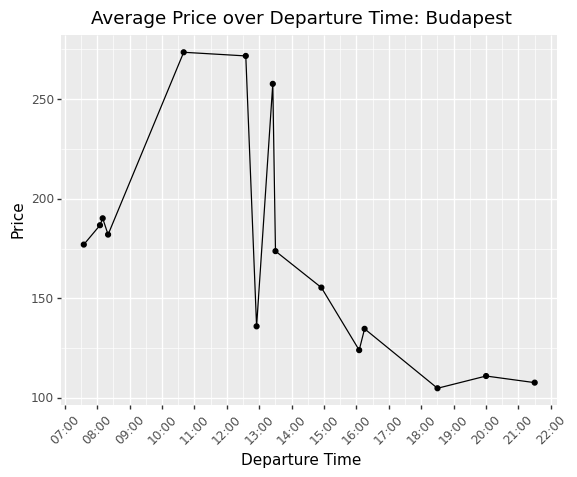

<ggplot: (8771883523581)>

In [25]:
df_budapest = pd.read_csv("../dep_flights/depFlights_0320/budapest_0320.csv")
flight_time_plot(df_budapest, 'Budapest')

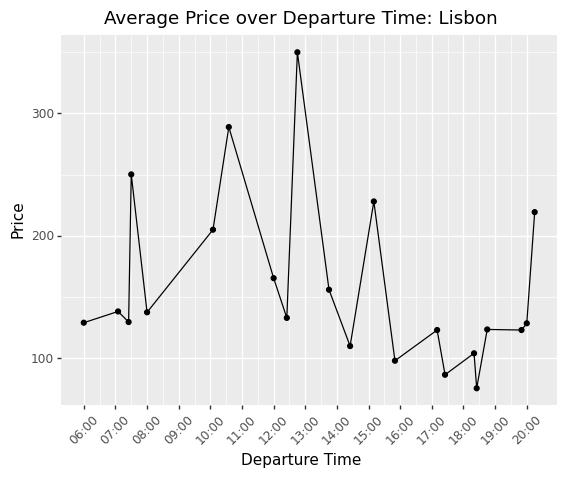

<ggplot: (8771917761031)>

In [26]:
df_lisbon = pd.read_csv("../dep_flights/depFlights_0320/lisbon_0320.csv")
flight_time_plot(df_lisbon, 'Lisbon')

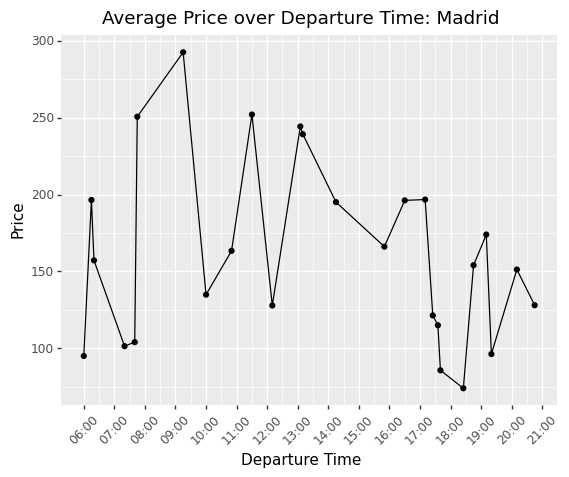

<ggplot: (8771917837306)>

In [27]:
df_madrid = pd.read_csv("../dep_flights/depFlights_0320/madrid_0320.csv")
flight_time_plot(df_madrid, 'Madrid')

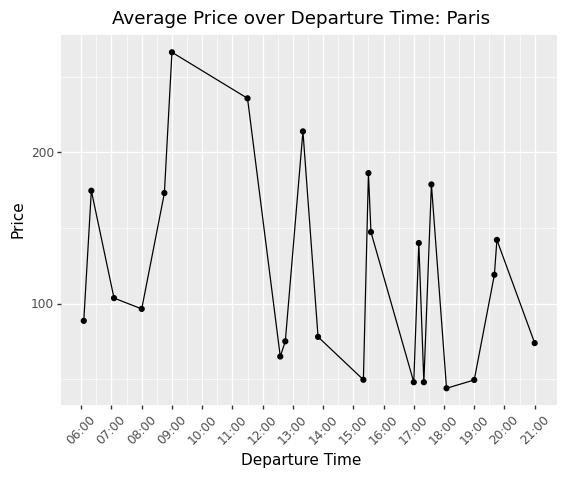

<ggplot: (8771883547152)>

In [28]:
df_paris = pd.read_csv("../dep_flights/depFlights_0320/paris_0320.csv")
flight_time_plot(df_paris, 'Paris')

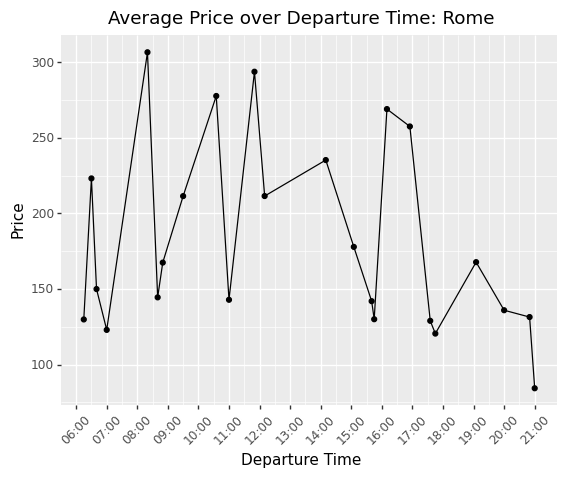

<ggplot: (8771951437906)>

In [29]:
df_rome = pd.read_csv("../dep_flights/depFlights_0320/rome_0320.csv")
flight_time_plot(df_rome, 'Rome')